In [ ]:
# OBJECTIUS: 
##    1) Conèixer variables i tècniques de Classificació 
         # 1) Arbres de classificació, 
         # 2) K – Nearest Neightbours, 
         # 3) Regressió Logística, 
         # 4) Support Vector Machine, 
         # 5) XGBoost.
##    2) Avaluar models de classificació.



# Exercicis d'algoritmes de Classificació.
## - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# - Exercici 1
# Crea almenys dos models de classificació diferents per intentar predir el millor les classes de l'arxiu adjunt.

# - Exercici 2
# Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confusió i d’altres mètriques més avançades.

# - Exercici 3
# Entrena’ls usant els diferents paràmetres que admeten per tal de millorar-ne la predicció.

# - Exercici 4
# Compara el seu rendiment fent servir l’aproximació traint/test o cross-validation.

# - Exercici 5
# Aplica algun procés d'enginyeria per millorar els resultats (normalització, estandardització, mostreig...)

## - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -


In [37]:
import pandas as pd
import numpy as np

dades= pd.read_csv('wineData.txt')


dades.columns=[ 'Nº de mostra','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols', 'Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue', 'OD280/OD315 of diluted wines','Proline'] 
print(dades.head())



print('\nDades del tipus', type(dades))

dades.shape
dades.info()


   Nº de mostra  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0             1    13.20        1.78  2.14               11.2        100   
1             1    13.16        2.36  2.67               18.6        101   
2             1    14.37        1.95  2.50               16.8        113   
3             1    13.24        2.59  2.87               21.0        118   
4             1    14.20        1.76  2.45               15.2        112   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.65        2.76                  0.26             1.28   
1           2.80        3.24                  0.30             2.81   
2           3.85        3.49                  0.24             2.18   
3           2.80        2.69                  0.39             1.82   
4           3.27        3.39                  0.34             1.97   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             4.38  1.05                          

In [42]:
# Contar los datos nulos
dades[dades.isnull().any(axis=1)].count()

# eliminar las finlas con datos nulos
dades = dades.dropna()

# Descripción estadística
dades.describe()



,Nº de mostra,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1.943503,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294,745.096045
std,0.773991,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103,314.884046
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000,500.000000
50%,2.000000,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000,672.000000
75%,3.000000,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


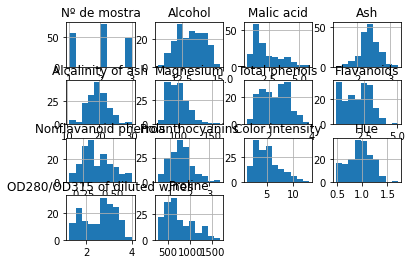

In [51]:
dades.drop(1).hist()
plt.show()

<AxesSubplot:>

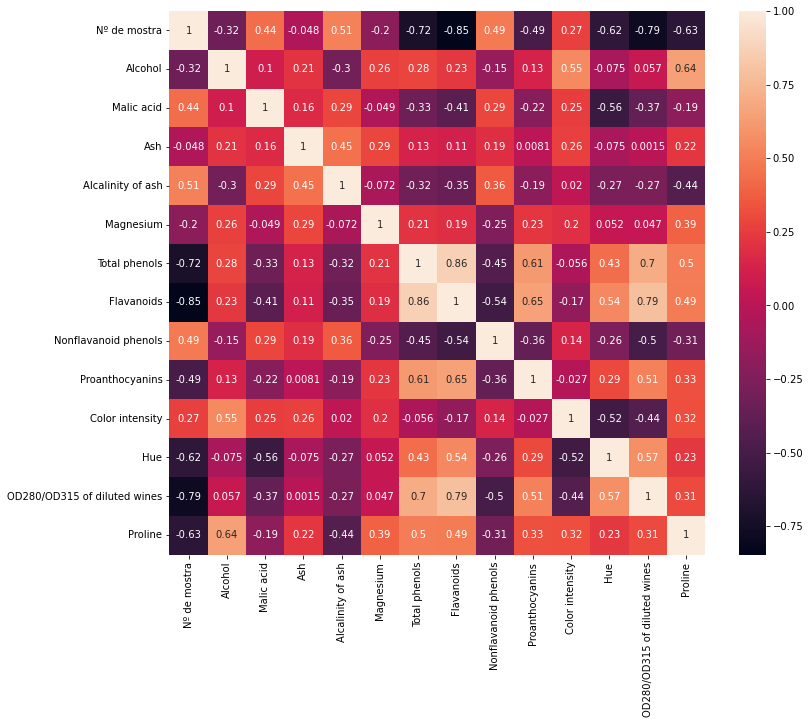

In [50]:
# Analitzem la correlació de les variables

dades_corr = dades.corr()

#print(dades_corr)

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(dades_corr, annot=True)


